# Reproducibility of Scientific simulations via onchain computation

In [31]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Simulation of population growth

Using the contract `population.cairo`, we can simulate the population growth at 10% PA.

In [62]:
trx_hash='0x45d19325297346b641ab03a564a3ddeae4fe3cd14721c733062e940c9c54b78'
# https://sepolia.starkscan.co/tx/0x45d19325297346b641ab03a564a3ddeae4fe3cd14721c733062e940c9c54b78#events
# https://sepolia.voyager.online/event/80533_37_9

In [63]:

headers = {
    'accept': 'application/json',
    'accept-language': 'en-US,en;q=0.9,de;q=0.8',
    'content-type': 'application/json',
    'origin': 'https://sepolia.starkscan.co',
    'priority': 'u=1, i',
    'referer': 'https://sepolia.starkscan.co/',
    'sec-ch-ua': '"Not/A)Brand";v="8", "Chromium";v="126", "Microsoft Edge";v="126"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36 Edg/126.0.0.0',
}

json_data = {
    'query': 'query EventsTableQuery(\n  $first: Int!\n  $after: String\n  $input: EventsInput!\n) {\n  ...EventsTablePaginationFragment_events_2DAjA4\n}\n\nfragment EventsTablePaginationFragment_events_2DAjA4 on Query {\n  events(first: $first, after: $after, input: $input) {\n    edges {\n      node {\n        id\n        ...EventsTableRowFragment_event\n        __typename\n      }\n      cursor\n    }\n    pageInfo {\n      endCursor\n      hasNextPage\n    }\n  }\n}\n\nfragment EventsTableRowFragment_event on Event {\n  event_id\n  block_number\n  transaction_hash\n  keys\n  key_identifier\n  from_address\n  from_identifier\n  from_contract {\n    is_social_verified\n    id\n  }\n  timestamp\n  data_decoded\n  data\n}\n',
    'variables': {
        'first': 30,
        'after': None,
        'input': {
            'transaction_hash': f'{trx_hash}',
            'sort_by': 'timestamp',
            'order_by': 'desc',
            'min_block_number': None,
            'max_block_number': None,
            'min_timestamp': None,
            'max_timestamp': None,
        },
    },
}

response = requests.post('https://graphql-sepolia.starkscan.co/', headers=headers, json=json_data)

In [64]:
events = json.loads(response.text)
events

{'data': {'events': {'edges': [{'node': {'id': 'RVZFTlQ6MHgwNDVkMTkzMjUyOTczNDZiNjQxYWIwM2E1NjRhM2RkZWFlNGZlM2NkMTQ3MjFjNzMzMDYyZTk0MGM5YzU0Yjc4XzEw',
      'event_id': '0x045d19325297346b641ab03a564a3ddeae4fe3cd14721c733062e940c9c54b78_10',
      'block_number': 80533,
      'transaction_hash': '0x045d19325297346b641ab03a564a3ddeae4fe3cd14721c733062e940c9c54b78',
      'keys': ['0x99cd8bde557814842a3121e8ddfd433a539b8c9f14bf31ebf108d12e6196e9'],
      'key_identifier': 'Transfer',
      'from_address': '0x04718f5a0fc34cc1af16a1cdee98ffb20c31f5cd61d6ab07201858f4287c938d',
      'from_identifier': 'StarkGate: STRK Token',
      'from_contract': {'is_social_verified': True,
       'id': 'Q09OVFJBQ1Q6MHgwNDcxOGY1YTBmYzM0Y2MxYWYxNmExY2RlZTk4ZmZiMjBjMzFmNWNkNjFkNmFiMDcyMDE4NThmNDI4N2M5Mzhk'},
      'timestamp': 1720899361,
      'data_decoded': [{'name': 'from',
        'type': 'core::starknet::contract_address::ContractAddress',
        'value': '0x45d4eff6a6172b8cfecc3cced1cdadf44fd0e5aa1

In [65]:
no_events = len(events['data']['events']['edges'])

In [66]:
year_list = []
population_list = []
for i in range(no_events):
    if i == 0:
        # the first one is just a header
        continue
    try:
        _,year,population=(events['data']['events']['edges'][i]['node']['keys'])
    except Exception as e:
        pass
    year = int(year,16)
    population = int(population,16)
    # print(year, population)
    year_list.append(year)
    population_list.append(population)



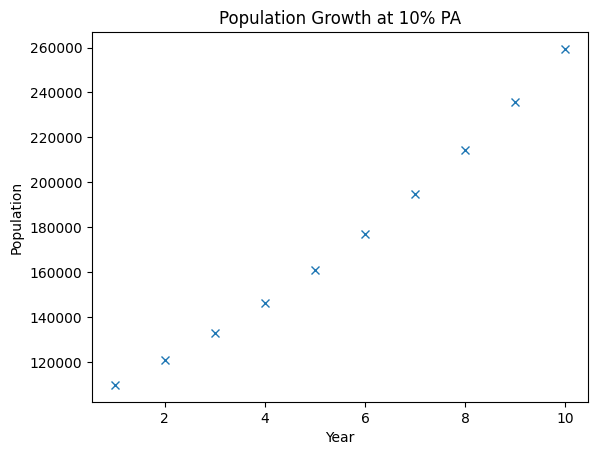

In [69]:
# Print the simulated result, population vs year count

plt.plot(year_list, population_list, 'x')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth at 10% PA')
plt.show()

In [68]:
population_list

[259372,
 235793,
 214358,
 194871,
 177156,
 161051,
 146410,
 133100,
 121000,
 110000]

## Simulation of 1d ising model

In [76]:
trx_hash='0x1298f9914701553db707b23e6389afbf74b9f13315413aedda7db94e8d09e97'
# https://sepolia.starkscan.co/tx/0x1298f9914701553db707b23e6389afbf74b9f13315413aedda7db94e8d09e97#events
# https://sepolia.voyager.online/event/80601_2_5

In [77]:

headers = {
    'accept': 'application/json',
    'accept-language': 'en-US,en;q=0.9,de;q=0.8',
    'content-type': 'application/json',
    'origin': 'https://sepolia.starkscan.co',
    'priority': 'u=1, i',
    'referer': 'https://sepolia.starkscan.co/',
    'sec-ch-ua': '"Not/A)Brand";v="8", "Chromium";v="126", "Microsoft Edge";v="126"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36 Edg/126.0.0.0',
}

json_data = {
    'query': 'query EventsTableQuery(\n  $first: Int!\n  $after: String\n  $input: EventsInput!\n) {\n  ...EventsTablePaginationFragment_events_2DAjA4\n}\n\nfragment EventsTablePaginationFragment_events_2DAjA4 on Query {\n  events(first: $first, after: $after, input: $input) {\n    edges {\n      node {\n        id\n        ...EventsTableRowFragment_event\n        __typename\n      }\n      cursor\n    }\n    pageInfo {\n      endCursor\n      hasNextPage\n    }\n  }\n}\n\nfragment EventsTableRowFragment_event on Event {\n  event_id\n  block_number\n  transaction_hash\n  keys\n  key_identifier\n  from_address\n  from_identifier\n  from_contract {\n    is_social_verified\n    id\n  }\n  timestamp\n  data_decoded\n  data\n}\n',
    'variables': {
        'first': 30,
        'after': None,
        'input': {
            'transaction_hash': f'{trx_hash}',
            'sort_by': 'timestamp',
            'order_by': 'desc',
            'min_block_number': None,
            'max_block_number': None,
            'min_timestamp': None,
            'max_timestamp': None,
        },
    },
}

response = requests.post('https://graphql-sepolia.starkscan.co/', headers=headers, json=json_data)

In [78]:
events = json.loads(response.text)
events

{'data': {'events': {'edges': [{'node': {'id': 'RVZFTlQ6MHgwMTI5OGY5OTE0NzAxNTUzZGI3MDdiMjNlNjM4OWFmYmY3NGI5ZjEzMzE1NDEzYWVkZGE3ZGI5NGU4ZDA5ZTk3XzEw',
      'event_id': '0x01298f9914701553db707b23e6389afbf74b9f13315413aedda7db94e8d09e97_10',
      'block_number': 80601,
      'transaction_hash': '0x01298f9914701553db707b23e6389afbf74b9f13315413aedda7db94e8d09e97',
      'keys': ['0x99cd8bde557814842a3121e8ddfd433a539b8c9f14bf31ebf108d12e6196e9'],
      'key_identifier': 'Transfer',
      'from_address': '0x04718f5a0fc34cc1af16a1cdee98ffb20c31f5cd61d6ab07201858f4287c938d',
      'from_identifier': 'StarkGate: STRK Token',
      'from_contract': {'is_social_verified': True,
       'id': 'Q09OVFJBQ1Q6MHgwNDcxOGY1YTBmYzM0Y2MxYWYxNmExY2RlZTk4ZmZiMjBjMzFmNWNkNjFkNmFiMDcyMDE4NThmNDI4N2M5Mzhk'},
      'timestamp': 1720924546,
      'data_decoded': [{'name': 'from',
        'type': 'core::starknet::contract_address::ContractAddress',
        'value': '0x45d4eff6a6172b8cfecc3cced1cdadf44fd0e5aa1

In [79]:
no_events = len(events['data']['events']['edges'])

In [85]:
population_list = []
for i in range(no_events):
    if i == 0:
        # the first one is just a header
        continue
    try:
        _,population=(events['data']['events']['edges'][i]['node']['keys'])
    except Exception as e:
        pass
    population = int(population,16)
    # print(year, population)
    population_list.append(population)



In [86]:
population_list

[0, 0, 8, 10, 26, 30, 30, 22, 20, 4]

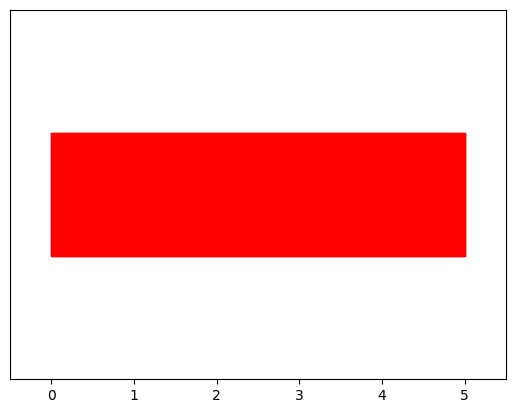

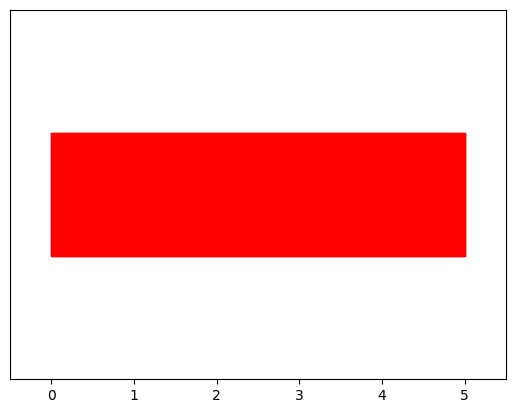

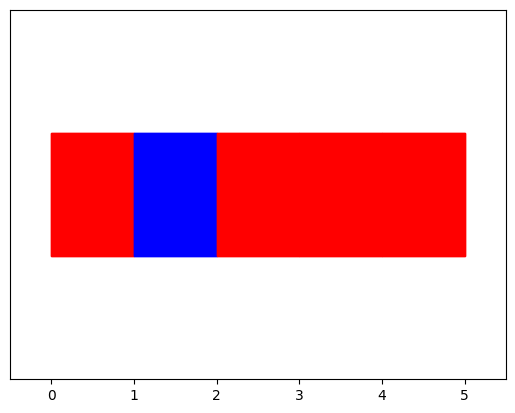

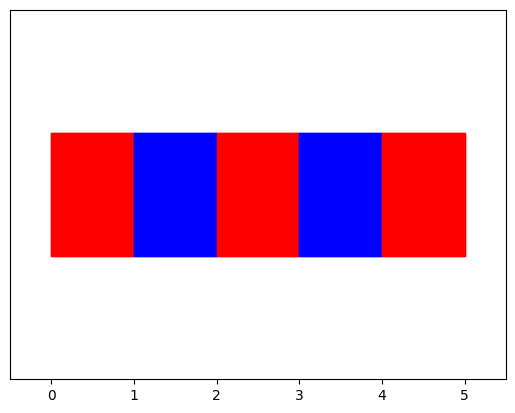

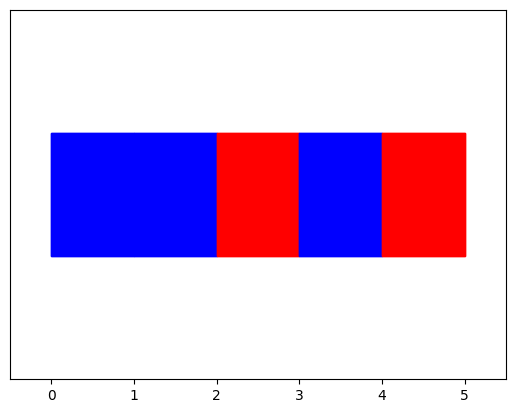

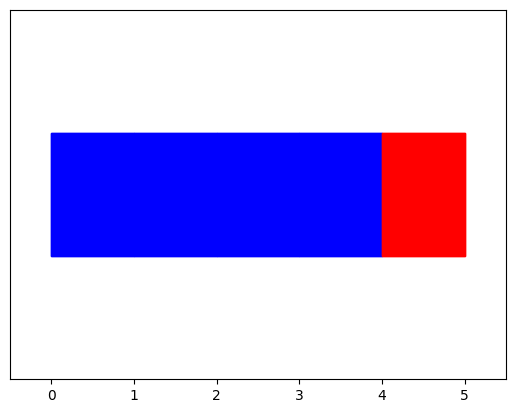

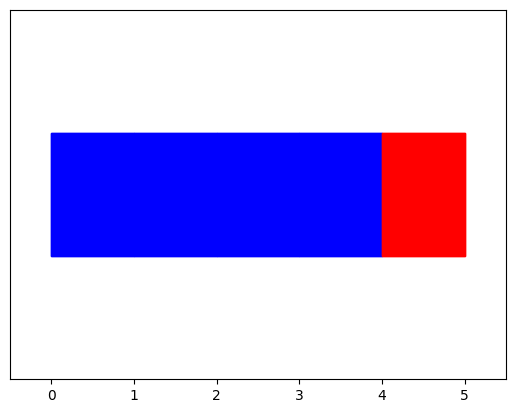

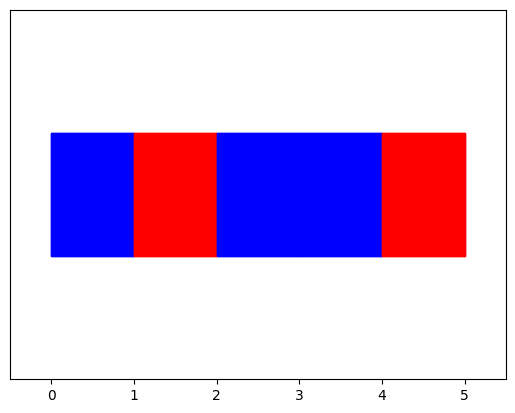

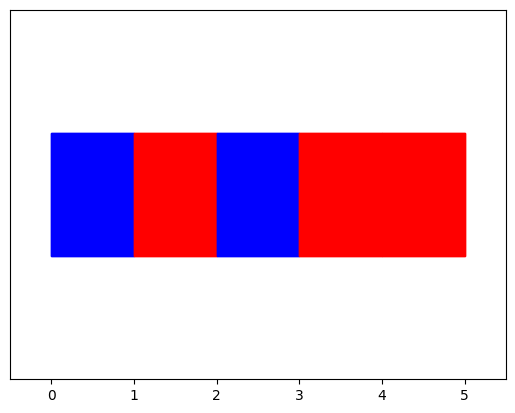

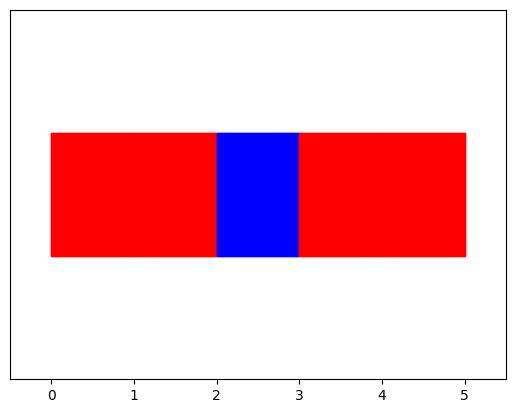

In [104]:
# for each of the element of the population list make a plt.plot of the spin latice
# first convert this to base 2 and then each of the bit in this representation is a spin
# they are either 1 or 0
# make a 5x1 box plot where each of the boxes is the value of the spin

for j,state in enumerate(population_list):
    spin_list = [i for i in bin(state)[2:].zfill(5)]
    # matplotlib make 5 boxes with blue or red boxes representing the spin 1 or 0
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, spin in enumerate(spin_list):
        if spin == '1':
            rec = ax.add_patch(patches.Rectangle((i, 0), 1, 1, color='blue'))
        else:
            rec = ax.add_patch(patches.Rectangle((i, 0), 1, 1, color='red'))
        ax.add_patch(rec)

    plt.xlim([-0.5, 5.5])
    plt.ylim([-1, 2])
    plt.yticks([])
    plt.savefig(f"sim/spin_latice_{j}.png")
    plt.show()
